In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../stratified_proximity_data.csv')

In [2]:
df

,experiment,duration,seeder,Cap2,time_between_0.05_and_0.5m,time_between_0.5_and_1m,time_between_1_and_2m,time_above_2m,infected
0,1,1,436,100,2.783333,10.600000,23.483333,25.850000,0
1,1,1,436,116,4.500000,20.983333,23.216667,13.916667,0
2,1,1,436,255,6.200000,20.900000,27.200000,8.416667,0
3,1,1,436,449,17.016667,20.733333,15.933333,9.050000,0
4,1,1,436,3008,0.183333,1.033333,9.700000,51.816667,0
...,...,...,...,...,...,...,...,...,...
59,6,8,116,218,7.366667,21.400000,103.483333,367.116667,0
60,6,8,116,255,0.450000,5.983333,71.166667,421.183333,0
61,6,8,116,436,15.500000,30.533333,137.266667,315.800000,0
62,6,8,116,742,29.816667,152.650000,145.266667,171.400000,0


In [3]:
# Calculate the sum of time values for each row
row_sums = df[['time_between_0.05_and_0.5m', 'time_between_0.5_and_1m', 'time_between_1_and_2m', 'time_above_2m']].sum(axis=1)

# Create a new DataFrame with normalized time values
normalized_df = df[['experiment', 'duration', 'seeder', 'Cap2', 'infected']].copy()
normalized_df['time_between_0.05_and_0.5m'] = df['time_between_0.05_and_0.5m'] / row_sums * 100
normalized_df['time_between_0.5_and_1m'] = df['time_between_0.5_and_1m'] / row_sums * 100
normalized_df['time_between_1_and_2m'] = df['time_between_1_and_2m'] / row_sums * 100
normalized_df['time_above_2m'] = df['time_above_2m'] / row_sums * 100

normalized_df



,experiment,duration,seeder,Cap2,infected,time_between_0.05_and_0.5m,time_between_0.5_and_1m,time_between_1_and_2m,time_above_2m
0,1,1,436,100,0,4.437948,16.901408,37.443529,41.217114
1,1,1,436,116,0,7.186585,33.510780,37.077455,22.225180
2,1,1,436,255,0,9.885729,33.324475,43.369652,13.420144
3,1,1,436,449,0,27.125399,33.049947,25.398512,14.426142
4,1,1,436,3008,0,0.292242,1.647184,15.462274,82.598300
...,...,...,...,...,...,...,...,...,...
59,6,8,116,218,0,1.475202,4.285428,20.722916,73.516454
60,6,8,116,255,0,0.090220,1.199586,14.268052,84.442143
61,6,8,116,436,0,3.105590,6.117678,27.502838,63.273893
62,6,8,116,742,0,5.973688,30.583011,29.103780,34.339522


In [21]:
infected_indices = np.where(df['infected'] == 1)[0].tolist()
infected_indices

[23, 26, 27, 28, 29, 31, 32, 33, 41, 42, 43, 44, 46, 52, 54, 57]

Text(0.5, 1.0, 'Stacked Bar Chart of Time Spent in Different Distance Ranges')

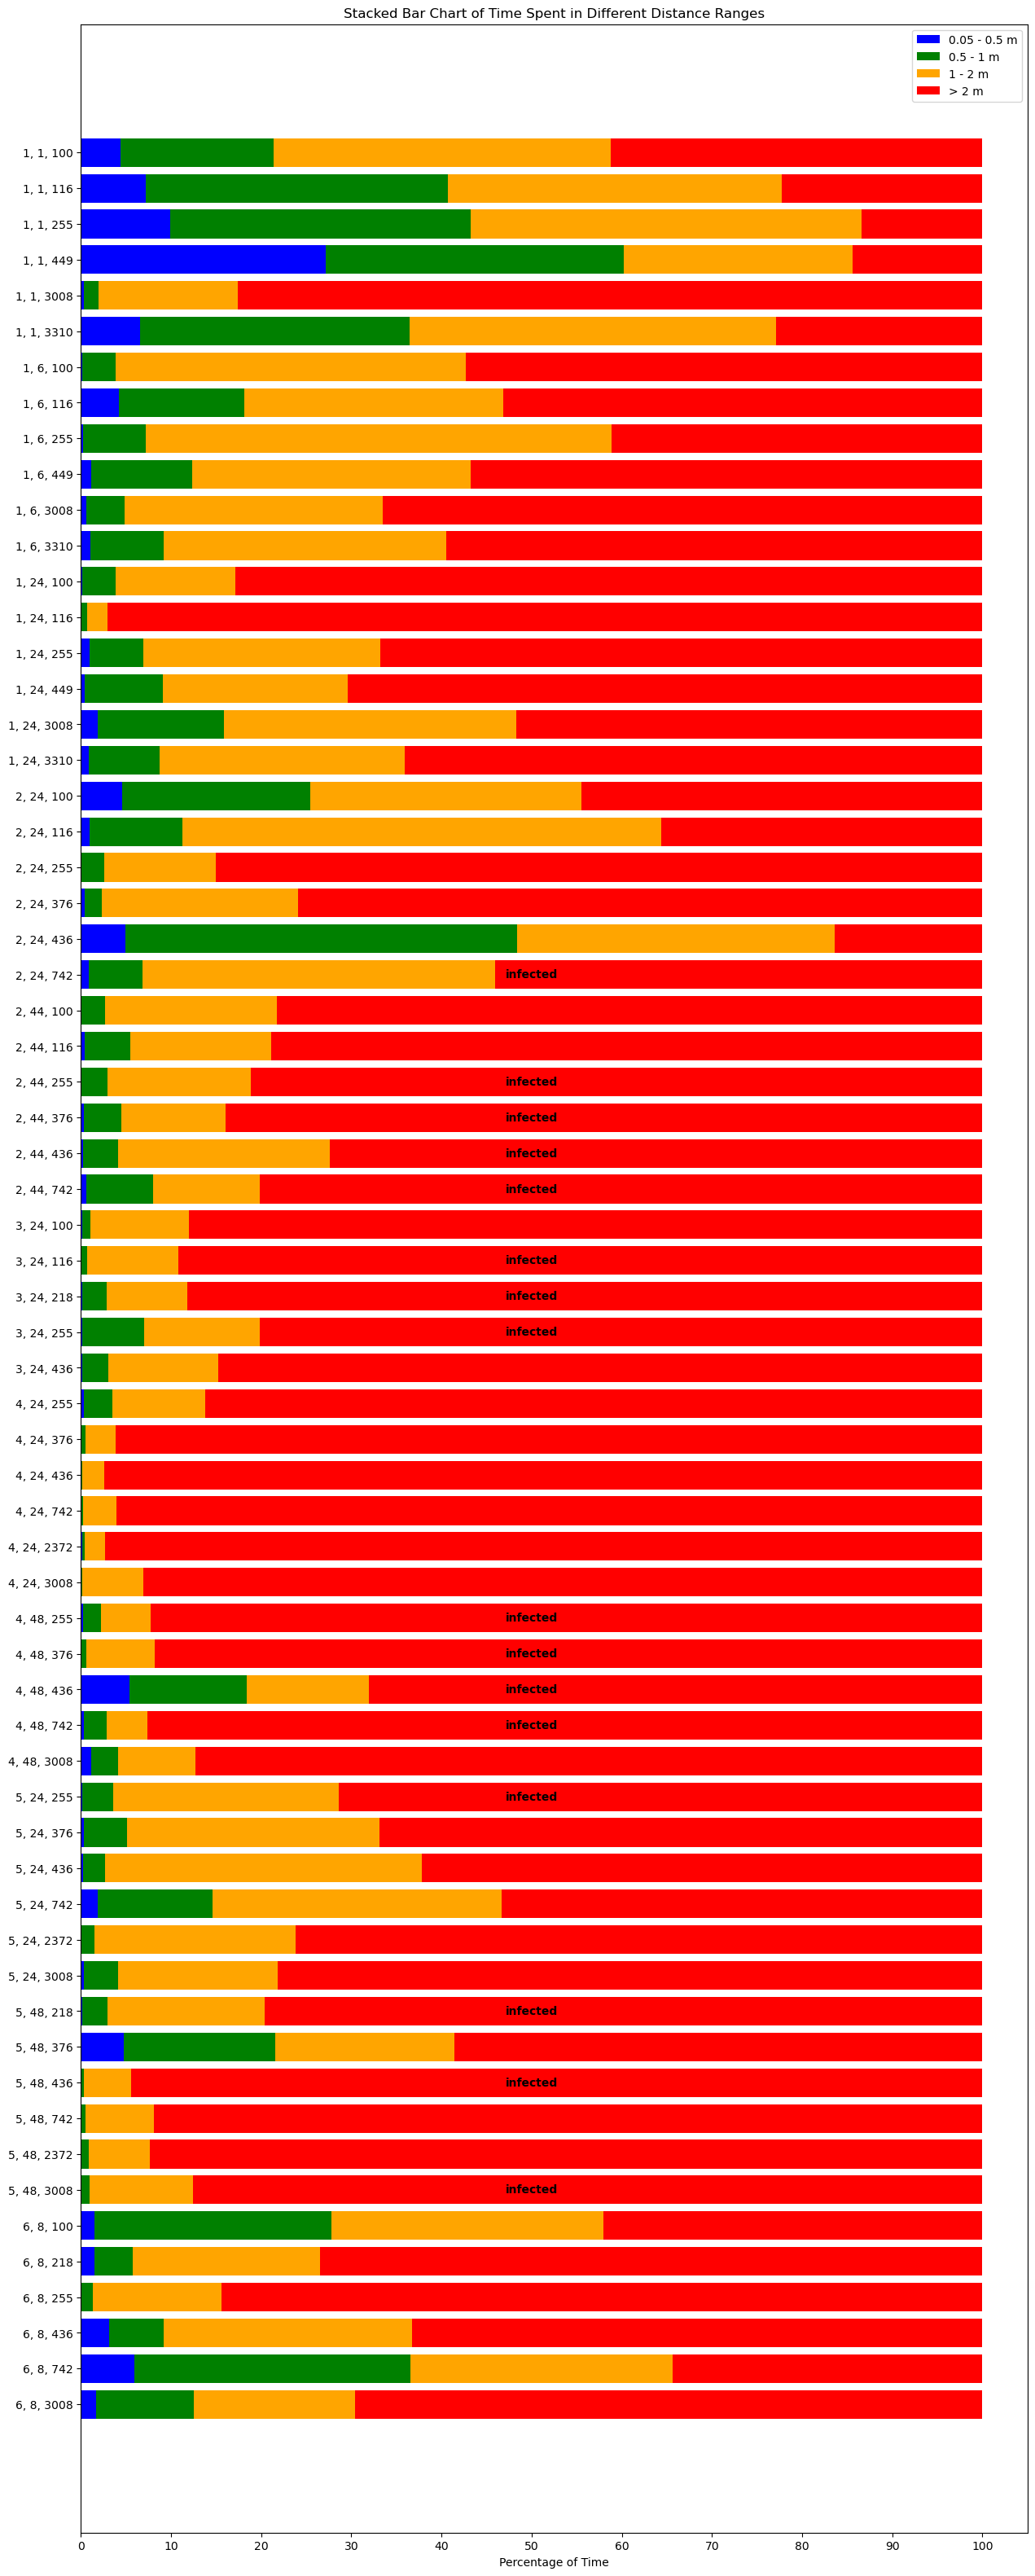

In [49]:
# Define the colors for each distance range
colors = ['blue', 'green', 'orange', 'red']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 40))

# Plot the stacked horizontal bars
ax.barh(normalized_df.index, normalized_df['time_between_0.05_and_0.5m'], color=colors[0], label='0.05 - 0.5 m')
ax.barh(normalized_df.index, normalized_df['time_between_0.5_and_1m'], left=normalized_df['time_between_0.05_and_0.5m'], color=colors[1], label='0.5 - 1 m')
ax.barh(normalized_df.index, normalized_df['time_between_1_and_2m'], left=normalized_df['time_between_0.05_and_0.5m'] + normalized_df['time_between_0.5_and_1m'], color=colors[2], label='1 - 2 m')
ax.barh(normalized_df.index, normalized_df['time_above_2m'], left=normalized_df['time_between_0.05_and_0.5m'] + normalized_df['time_between_0.5_and_1m'] + normalized_df['time_between_1_and_2m'], color=colors[3], label='> 2 m')

# Add labels for distance range
ax.set_yticks(normalized_df.index)
ax.set_yticklabels(normalized_df['experiment'])

# Add a legend
ax.legend()

# Set the x-axis label
ax.set_xlabel('Percentage of Time')

# Show the plot

# Concatenate the labels for y-axis ticks
tick_labels = normalized_df['experiment'].astype(str) + ', ' + normalized_df['duration'].astype(str) + ', ' + normalized_df['Cap2'].astype(str)

# Set the tick labels
ax.set_yticklabels(tick_labels)
# Sort the bars by y-axis ticks
ax.invert_yaxis()

# Set the x-axis tick frequency to 10%
ax.set_xticks(np.arange(0, 101, 10))

# Fix to show "infected" text
for i, (infected, total_width) in enumerate(zip(normalized_df['infected'], normalized_df['time_between_0.05_and_0.5m'] + normalized_df['time_between_0.5_and_1m'] + normalized_df['time_between_1_and_2m'] + normalized_df['time_above_2m'])):
    if infected:
        ax.text(total_width/2, i, 'infected', va='center', ha='center', color='black', fontweight='bold')


plt.title('Stacked Bar Chart of Time Spent in Different Distance Ranges')


In [50]:
fig.savefig('figure.pdf', dpi=300, bbox_inches='tight', format='pdf')